In [1]:
# Import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

import acquire, prepare

## 1. Spam Data
### a. Load and preapre the spam data set

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1])
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Get total counts and the proportion of ham vs. spam

labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)

# Renmae the columns
labels.columns = ['n', 'percent']

# Print the labels
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


In [4]:
# Clean the text using helper function
df = prepare.prep_spam_data(df, 'text')

# Take a peak at the cleaned dataset
df.head()

,label,text,stemmed,lemmatized,clean
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goe to usf he live around...,nah i don't think he go to usf he life around ...,nah ' think go usf life around though


In [8]:
# Add a column with list of words
words = [re.sub(r'([^a-z0-9\s]\s.\s)', '', doc).split() for doc in df.clean]

# column will named words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)
df.head()

,label,text,stemmed,lemmatized,clean,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goe to usf he live around...,nah i don't think he go to usf he life around ...,nah ' think go usf life around though,"[nah, ', think, go, usf, life, around, though]"


In [18]:
# To finalize the preparation for exploration:
# 1. Add a feature that is the length of each document
# 2. Build a set of ham_words and spam_words to explore

ham_words = ' '.join(df[df.label == 'ham'].clean)
spam_words = ' '.join(df[df.label == 'spam'].clean)

# Remove any single character

ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)

# Take a look at the spam_words
spam_words[:200]

'free entrywkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcapply 08452810075over18freemsg hey darling3 weekword backlike fun still tb ok xxx std chgs sen'

### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [20]:
# Use nltk to create a column with bigrams

df['bigrams'] = [list(nltk.ngrams(words, 2)) for words in df.words]
df.head()

,label,text,stemmed,lemmatized,clean,words,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[(ok, lar), (lar, joking), (joking, wif), (wif..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[(free, entry), (entry, 2), (2, wkly), (wkly, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]","[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goe to usf he live around...,nah i don't think he go to usf he life around ...,nah ' think go usf life around though,"[nah, ', think, go, usf, life, around, though]","[(nah, '), (', think), (think, go), (go, usf),..."


In [35]:
# Create the top 20 most frequent bigrams for the spam data

spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(20)
spam_bigrams.head()

(please, call)         43
(customer, service)    27
(po, box)              23
(guaranteed, call)     23
(prize, guaranteed)    22
dtype: int64

In [36]:
# Create the top 20 most frequent bigrams for the ham data

ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(20)
ham_bigrams.head()

(sorrycall, later)    33
(let, know)           33
(good, morning)       30
(new, year)           26
(pls, send)           22
dtype: int64

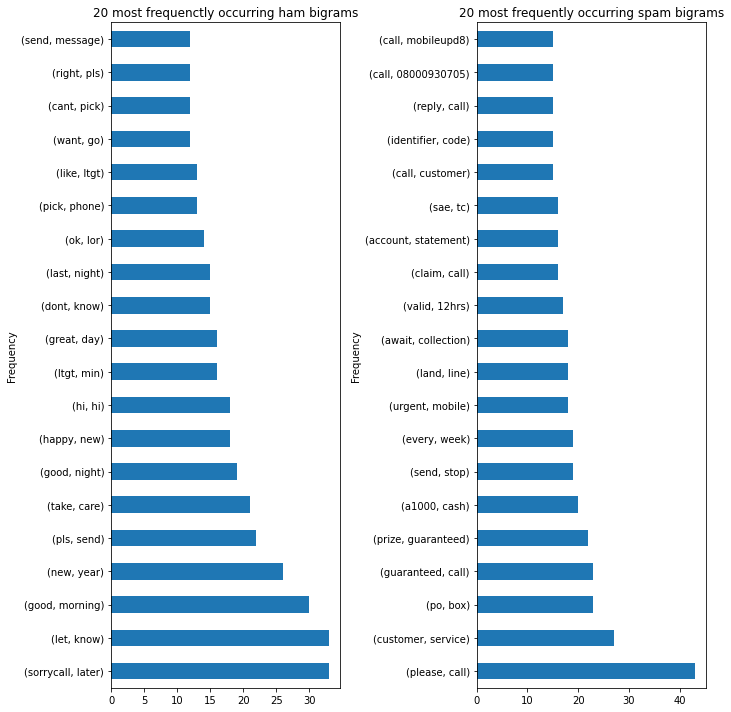

In [45]:
# Visualize the top 20 most frequent bigrams for spam and ham datasets

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

ham_bigrams.plot.barh(ax=ax1, title='20 most frequenctly occurring ham bigrams',
                      xlabel='Frequency', ylabel='Bigram')

spam_bigrams.plot.barh(ax=ax2, title='20 most frequently occurring spam bigrams',
                       xlabel='Frequency', ylabel='Bigram')

plt.tight_layout()
plt.show()

In [47]:
# Convert to dictionary to fit to the 'generate_from_frequencies' method

spam_bigrams_dict = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
ham_bigrams_dict = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}

spam_bigrams_dict

{'please call': 43,
 'customer service': 27,
 'po box': 23,
 'guaranteed call': 23,
 'prize guaranteed': 22,
 'a1000 cash': 20,
 'send stop': 19,
 'every week': 19,
 'urgent mobile': 18,
 'land line': 18,
 'await collection': 18,
 'valid 12hrs': 17,
 'claim call': 16,
 'account statement': 16,
 'sae tc': 16,
 'call customer': 15,
 'identifier code': 15,
 'reply call': 15,
 'call 08000930705': 15,
 'call mobileupd8': 15}

In [60]:
# Create a WordCloud object for the bigrams

img_spam = WordCloud(background_color = 'white', 
                width=800, height=400).generate_from_frequencies(spam_bigrams_dict)

img_ham = WordCloud(background_color = 'white', 
                width=800, height=400).generate_from_frequencies(ham_bigrams_dict)

img_spam

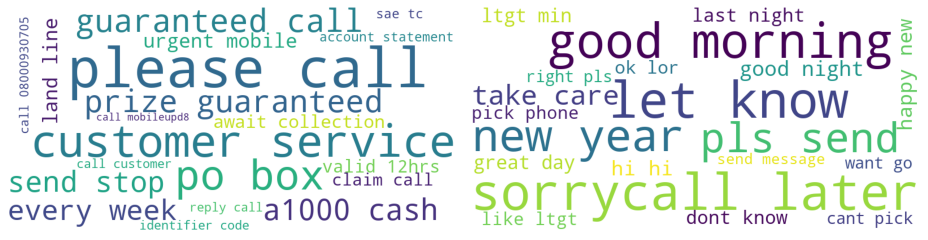

In [70]:
plt.figure(figsize=(13, 13))

plt.subplot(121)
plt.imshow(img_spam)
plt.axis('off')

plt.subplot(122)
plt.imshow(img_ham)
plt.axis('off')

plt.tight_layout()
plt.show()

### c. Is there any overlap in the bigrams for the spam data and the ham data?

In [76]:
# Use set operation to answer the question: no overlap in the top 20 most frequent bigrams. 

set(spam_bigrams.index) & set(ham_bigrams.index)

set()

### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [77]:
# Use nltk to create a column with bigrams

df['trigrams'] = [list(nltk.ngrams(words, 3)) for words in df.words]
df.head()

,label,text,stemmed,lemmatized,clean,words,bigrams,trigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[(go, jurong), (jurong, point), (point, crazy)...","[(go, jurong, point), (jurong, point, crazy), ..."
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[(ok, lar), (lar, joking), (joking, wif), (wif...","[(ok, lar, joking), (lar, joking, wif), (jokin..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[(free, entry), (entry, 2), (2, wkly), (wkly, ...","[(free, entry, 2), (entry, 2, wkly), (2, wkly,..."
3,ham,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]","[(u, dun), (dun, say), (say, early), (early, h...","[(u, dun, say), (dun, say, early), (say, early..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goe to usf he live around...,nah i don't think he go to usf he life around ...,nah ' think go usf life around though,"[nah, ', think, go, usf, life, around, though]","[(nah, '), (', think), (think, go), (go, usf),...","[(nah, ', think), (', think, go), (think, go, ..."


In [78]:
# Create the top 20 most frequent trigrams for the spam and ham data

spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts().head(20)
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts().head(20)

spam_trigrams

(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(2003, account, statement)             13
(private, 2003, account)               13
(reply, call, 08000930705)             13
(show, 800, unredeemed)                12
(guaranteed, a1000, cash)              12
(camcorder, reply, call)               12
(anytime, network, min)                11
(every, week, txt)                     11
(bonus, caller, prize)                 11
(cash, await, collection)              10
(customer, service, representative)    10
(please, call, customer)               10
(a2000, bonus, caller)                 10
(draw, txt, music)                      9
(750, anytime, network)                 9
(a2000, prize, guaranteed)              9
(unredeemed, point, call)               9
dtype: int64

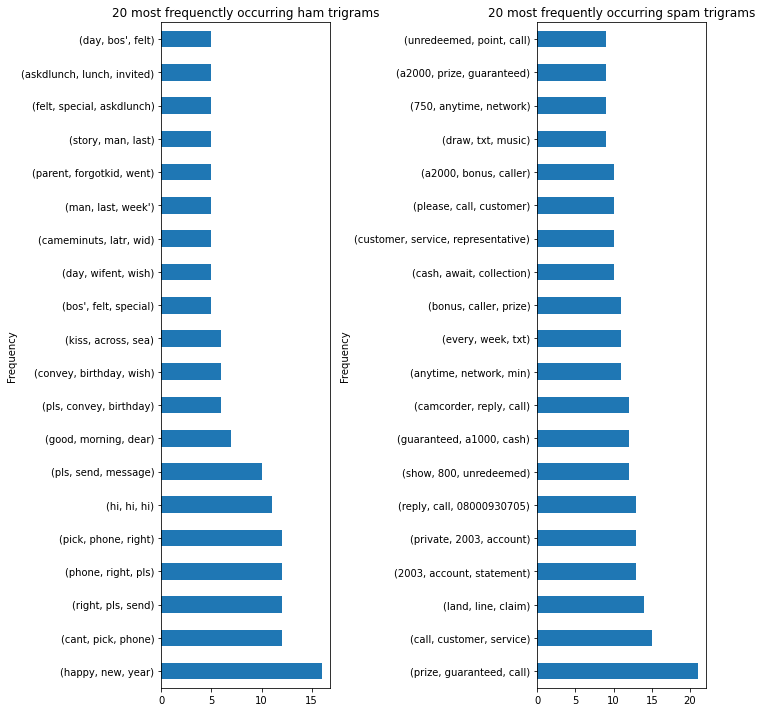

In [79]:
# Visualize the top 20 most frequent trigrams for spam and ham datasets

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

ham_trigrams.plot.barh(ax=ax1, title='20 most frequenctly occurring ham trigrams',
                       xlabel='Frequency', ylabel='Trigram')

spam_trigrams.plot.barh(ax=ax2, title='20 most frequently occurring spam trigrams',
                        xlabel='Frequency', ylabel='Trigram')

plt.tight_layout()
plt.show()

In [81]:
# Convert to dictionary to fit to the 'generate_from_frequencies' method

spam_trigrams_dict = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in spam_trigrams.to_dict().items()}
ham_trigrams_dict = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}

spam_trigrams_dict

{'prize guaranteed call': 21,
 'call customer service': 15,
 'land line claim': 14,
 '2003 account statement': 13,
 'private 2003 account': 13,
 'reply call 08000930705': 13,
 'show 800 unredeemed': 12,
 'guaranteed a1000 cash': 12,
 'camcorder reply call': 12,
 'anytime network min': 11,
 'every week txt': 11,
 'bonus caller prize': 11,
 'cash await collection': 10,
 'customer service representative': 10,
 'please call customer': 10,
 'a2000 bonus caller': 10,
 'draw txt music': 9,
 '750 anytime network': 9,
 'a2000 prize guaranteed': 9,
 'unredeemed point call': 9}

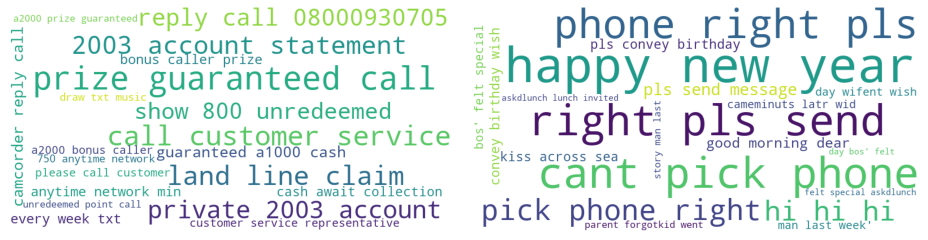

In [82]:
# Create a WordCloud object for the bigrams

img_spam = WordCloud(background_color = 'white', 
                width=800, height=400).generate_from_frequencies(spam_trigrams_dict)

img_ham = WordCloud(background_color = 'white', 
                width=800, height=400).generate_from_frequencies(ham_trigrams_dict)

plt.figure(figsize=(13, 13))

plt.subplot(121)
plt.imshow(img_spam)
plt.axis('off')

plt.subplot(122)
plt.imshow(img_ham)
plt.axis('off')

plt.tight_layout()
plt.show()